In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


In [11]:
df = pd.read_csv('/home/chinghia/AI_Engineer/Data/Automobile_data.csv')

In [12]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [14]:
df['price']=df['price'].replace('?',np.nan)

In [15]:

df['price']=df['price'].astype('float')
df.dropna(subset=['price'], inplace=True)

In [16]:
X=df.drop('price',axis=1)
y=df['price']

In [17]:
X.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22


In [18]:
X.shape

(201, 25)

In [19]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 201, dtype: float64

In [20]:
y.shape

(201,)

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non-null

In [22]:
X.replace('?',np.nan,inplace=True)

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non-null

In [24]:
cat_future=['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']
le=LabelEncoder()
for col in cat_future:
    X[col]=le.fit_transform(X[col])
X

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,NaN,0,1,0,1,0,2,0,88.6,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
1,3,NaN,0,1,0,1,0,2,0,88.6,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
2,1,NaN,0,1,0,1,2,2,0,94.5,...,3,152,5,2.68,3.47,9.0,154,5000,19,26
3,2,164,1,1,0,0,3,1,0,99.8,...,2,109,5,3.19,3.4,10.0,102,5500,24,30
4,2,164,1,1,0,0,3,0,0,99.4,...,1,136,5,3.19,3.4,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,21,1,0,0,3,2,0,109.1,...,2,141,5,3.78,3.15,9.5,114,5400,23,28
201,-1,95,21,1,1,0,3,2,0,109.1,...,2,141,5,3.78,3.15,8.7,160,5300,19,25
202,-1,95,21,1,0,0,3,2,0,109.1,...,3,173,5,3.58,2.87,8.8,134,5500,18,23
203,-1,95,21,0,1,0,3,2,0,109.1,...,3,145,3,3.01,3.4,23.0,106,4800,26,27


In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               201 non-null    int64  
 3   fuel-type          201 non-null    int64  
 4   aspiration         201 non-null    int64  
 5   num-of-doors       201 non-null    int64  
 6   body-style         201 non-null    int64  
 7   drive-wheels       201 non-null    int64  
 8   engine-location    201 non-null    int64  
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    int64  
 15  num-of-cylinders   201 non-null    int64  
 16  engine-size        201 non-null

In [26]:
col_float=['normalized-losses','bore','stroke','horsepower','peak-rpm']
for col in col_float:
    X[col]=X[col].astype('float')

In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               201 non-null    int64  
 3   fuel-type          201 non-null    int64  
 4   aspiration         201 non-null    int64  
 5   num-of-doors       201 non-null    int64  
 6   body-style         201 non-null    int64  
 7   drive-wheels       201 non-null    int64  
 8   engine-location    201 non-null    int64  
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    int64  
 15  num-of-cylinders   201 non-null    int64  
 16  engine-size        201 non-null

In [28]:
OJ = X.select_dtypes(include=['object']).columns
OJ

Index([], dtype='object')

In [29]:
X.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,NaN,0,1,0,1,0,2,0,88.6,...,2,130,5,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,NaN,0,1,0,1,0,2,0,88.6,...,2,130,5,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,NaN,0,1,0,1,2,2,0,94.5,...,3,152,5,2.68,3.47,9.0,154.0,5000.0,19,26
3,2,164.0,1,1,0,0,3,1,0,99.8,...,2,109,5,3.19,3.40,10.0,102.0,5500.0,24,30
4,2,164.0,1,1,0,0,3,0,0,99.4,...,1,136,5,3.19,3.40,8.0,115.0,5500.0,18,22


In [30]:
value_null=['normalized-losses','num-of-doors','bore','stroke']

In [31]:
sim=SimpleImputer(missing_values=np.nan,strategy='mean')
for col in value_null:
    X[col]=sim.fit_transform(X[[col]])
X

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,122.0,0,1,0,1.0,0,2,0,88.6,...,2,130,5,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,122.0,0,1,0,1.0,0,2,0,88.6,...,2,130,5,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,122.0,0,1,0,1.0,2,2,0,94.5,...,3,152,5,2.68,3.47,9.0,154.0,5000.0,19,26
3,2,164.0,1,1,0,0.0,3,1,0,99.8,...,2,109,5,3.19,3.40,10.0,102.0,5500.0,24,30
4,2,164.0,1,1,0,0.0,3,0,0,99.4,...,1,136,5,3.19,3.40,8.0,115.0,5500.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,21,1,0,0.0,3,2,0,109.1,...,2,141,5,3.78,3.15,9.5,114.0,5400.0,23,28
201,-1,95.0,21,1,1,0.0,3,2,0,109.1,...,2,141,5,3.78,3.15,8.7,160.0,5300.0,19,25
202,-1,95.0,21,1,0,0.0,3,2,0,109.1,...,3,173,5,3.58,2.87,8.8,134.0,5500.0,18,23
203,-1,95.0,21,0,1,0.0,3,2,0,109.1,...,3,145,3,3.01,3.40,23.0,106.0,4800.0,26,27


In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
model=RandomForestRegressor(n_estimators=1000,max_depth=20,n_jobs=-1,random_state=42)
model.fit(X_train,y_train)

,n_estimators,1000
,criterion,'squared_error'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [34]:
y_pred=model.predict(X_test)

In [35]:
T=pd.DataFrame({'Du doan':y_pred ,'Thuc te':y_test ,'Chenh lenh':y_pred-y_test})
T.head()

,Du doan,Thuc te,Chenh lenh
98,7028.403483,8249.0,-1220.596517
16,30801.518000,41315.0,-10513.482000
31,6246.172000,6855.0,-608.828000
162,8020.020000,9258.0,-1237.980000
132,12836.385583,11850.0,986.385583


In [36]:
score=model.score(X_test,y_test)
score

0.9302029818261466

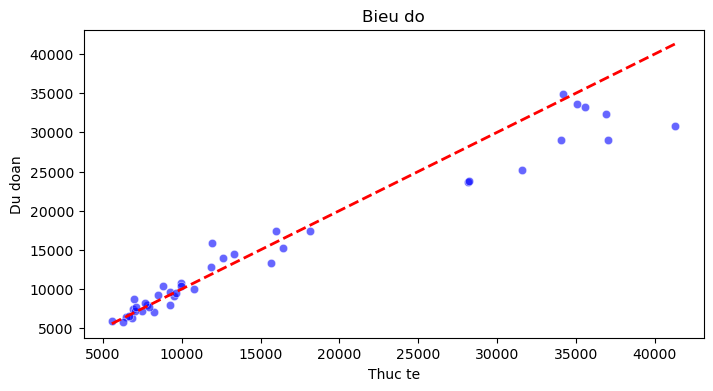

In [37]:
y_pred = model.predict(X_test)

plt.figure(figsize=(8, 4))

#bieu do phan tan
sns.scatterplot(x=y_test, y=y_pred.flatten(), color='blue', alpha=0.6)

#Ve duong cheo
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel('Thuc te')
plt.ylabel('Du doan')
plt.title('Bieu do')
plt.show()